In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import kernel
from deflected_subgradient import solveDeflected
from SVR import *
import matplotlib.pyplot as plt
import random

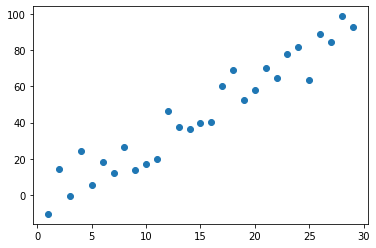

In [28]:
x = np.vstack(np.arange(1,30,1))
y = np.array([3*x[i]+random.uniform(-15,15) for i in range(len(x))])
plt.scatter(x,y)
plt.show()

In [3]:
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(x)
y = sc_y.fit_transform(y)

vareps = optim_args['vareps'] if 'vareps' in optim_args else 0.1
    maxiter = optim_args['maxiter'] if 'maxiter' in optim_args else 10000
    deltares = optim_args['deltares'] if 'deltares' in optim_args else 1e-4
    rho = optim_args['rho'] if 'rho' in optim_args else 0.95
    eps = optim_args['eps'] if 'eps' in optim_args else 1e-1
    alpha = optim_args['alpha'] if 'alpha' in optim_args else 0.7
    psi = optim_args['psi'] if 'psi' in optim_args else 0.7
    return vareps, maxiter, deltares, rho, eps, alpha, psi

In [4]:
K = kernel.linear(x)
box = 1.0
x_init = np.zeros(x.shape)
beta = solveDeflected(x_init, y, K, box, {'eps':1e-2, 'maxiter':3e+3}, True)

i:    0 - v: 0.000000 - fref:  inf - ||g||: 5.385165 - delta: 0.000000e+00 - ||gdiff||:  inf - eps: 1.000000e-02
i:    1 - v: -0.000092 - fref: 0.000000 - ||g||: 4.935639 - delta: 1.000000e-04 - ||gdiff||: 0.449526 - eps: 1.000000e-02
i:    2 - v: -0.007591 - fref: -0.000092 - ||g||: 4.898661 - delta: 1.000000e-02 - ||gdiff||: 0.036978 - eps: 1.000000e-02
i:    3 - v: -0.014694 - fref: -0.007591 - ||g||: 4.858425 - delta: 1.000000e-02 - ||gdiff||: 0.040235 - eps: 1.000000e-02
i:    4 - v: -0.021687 - fref: -0.014694 - ||g||: 4.820764 - delta: 1.000000e-02 - ||gdiff||: 0.037662 - eps: 1.000000e-02
i:    5 - v: -0.028650 - fref: -0.021687 - ||g||: 4.783679 - delta: 1.000000e-02 - ||gdiff||: 0.037085 - eps: 1.000000e-02
i:    6 - v: -0.035599 - fref: -0.028650 - ||g||: 4.745748 - delta: 1.000000e-02 - ||gdiff||: 0.037931 - eps: 1.000000e-02
i:    7 - v: -0.042548 - fref: -0.035599 - ||g||: 4.708383 - delta: 1.000000e-02 - ||gdiff||: 0.037365 - eps: 1.000000e-02
i:    8 - v: -0.049492 - fr

i:  205 - v: -1.515896 - fref: -1.505382 - ||g||: 1.248586 - delta: 1.505382e-02 - ||gdiff||: -0.008132 - eps: 1.000000e-02
i:  206 - v: -1.526439 - fref: -1.515896 - ||g||: 1.247656 - delta: 1.515896e-02 - ||gdiff||: 0.000931 - eps: 1.000000e-02
i:  207 - v: -1.537041 - fref: -1.526439 - ||g||: 1.240549 - delta: 1.526439e-02 - ||gdiff||: 0.007107 - eps: 1.000000e-02
i:  208 - v: -1.547804 - fref: -1.537041 - ||g||: 1.240466 - delta: 1.537041e-02 - ||gdiff||: 0.000083 - eps: 1.000000e-02
i:  209 - v: -1.558632 - fref: -1.547804 - ||g||: 1.248622 - delta: 1.547804e-02 - ||gdiff||: -0.008156 - eps: 1.000000e-02
i:  210 - v: -1.569408 - fref: -1.558632 - ||g||: 1.247669 - delta: 1.558632e-02 - ||gdiff||: 0.000953 - eps: 1.000000e-02
i:  211 - v: -1.580357 - fref: -1.569408 - ||g||: 1.240521 - delta: 1.569408e-02 - ||gdiff||: 0.007148 - eps: 1.000000e-02
i:  212 - v: -1.591424 - fref: -1.580357 - ||g||: 1.240443 - delta: 1.580357e-02 - ||gdiff||: 0.000077 - eps: 1.000000e-02
i:  213 - v: -

i:  407 - v: -4.855236 - fref: -4.849575 - ||g||: 1.273548 - delta: 2.424788e-02 - ||gdiff||: 0.010336 - eps: 5.000000e-03
i:  408 - v: -4.860724 - fref: -4.855236 - ||g||: 1.270633 - delta: 2.427618e-02 - ||gdiff||: 0.002915 - eps: 5.000000e-03
i:  409 - v: -4.865860 - fref: -4.860724 - ||g||: 1.269120 - delta: 2.430362e-02 - ||gdiff||: 0.001513 - eps: 5.000000e-03
i:  410 - v: -4.870932 - fref: -4.865860 - ||g||: 1.275254 - delta: 2.432930e-02 - ||gdiff||: -0.006134 - eps: 5.000000e-03
i:  411 - v: -4.876005 - fref: -4.870932 - ||g||: 1.265047 - delta: 2.435466e-02 - ||gdiff||: 0.010208 - eps: 5.000000e-03
i:  412 - v: -4.881074 - fref: -4.876005 - ||g||: 1.265119 - delta: 2.438003e-02 - ||gdiff||: -0.000072 - eps: 5.000000e-03
i:  413 - v: -4.886268 - fref: -4.881074 - ||g||: 1.264390 - delta: 2.440537e-02 - ||gdiff||: 0.000728 - eps: 5.000000e-03
i:  414 - v: -4.891206 - fref: -4.886268 - ||g||: 1.279339 - delta: 2.443134e-02 - ||gdiff||: -0.014949 - eps: 5.000000e-03
i:  415 - v: 

i:  608 - v: -5.374752 - fref: -5.373939 - ||g||: 1.252943 - delta: 1.343485e-02 - ||gdiff||: -0.004668 - eps: 2.500000e-03
i:  609 - v: -5.375625 - fref: -5.374752 - ||g||: 1.248328 - delta: 1.343688e-02 - ||gdiff||: 0.004615 - eps: 2.500000e-03
i:  610 - v: -5.376461 - fref: -5.375625 - ||g||: 1.248348 - delta: 1.343906e-02 - ||gdiff||: -0.000020 - eps: 2.500000e-03
i:  611 - v: -5.377195 - fref: -5.376461 - ||g||: 1.248286 - delta: 1.344115e-02 - ||gdiff||: 0.000062 - eps: 2.500000e-03
i:  612 - v: -5.377759 - fref: -5.377195 - ||g||: 1.247675 - delta: 1.344299e-02 - ||gdiff||: 0.000610 - eps: 2.500000e-03
i:  613 - v: -5.378313 - fref: -5.377759 - ||g||: 1.257179 - delta: 1.344440e-02 - ||gdiff||: -0.009503 - eps: 2.500000e-03
i:  614 - v: -5.378903 - fref: -5.378313 - ||g||: 1.248173 - delta: 1.344578e-02 - ||gdiff||: 0.009005 - eps: 2.500000e-03
i:  615 - v: -5.379460 - fref: -5.378903 - ||g||: 1.247379 - delta: 1.344726e-02 - ||gdiff||: 0.000794 - eps: 2.500000e-03
i:  616 - v: 

i:  825 - v: -5.458217 - fref: -5.458077 - ||g||: 1.241973 - delta: 6.822597e-03 - ||gdiff||: 0.012038 - eps: 1.250000e-03
i:  826 - v: -5.458342 - fref: -5.458217 - ||g||: 1.244708 - delta: 6.822771e-03 - ||gdiff||: -0.002734 - eps: 1.250000e-03
i:  827 - v: -5.458466 - fref: -5.458342 - ||g||: 1.238808 - delta: 6.822927e-03 - ||gdiff||: 0.005899 - eps: 1.250000e-03
i:  828 - v: -5.458583 - fref: -5.458466 - ||g||: 1.241985 - delta: 6.823082e-03 - ||gdiff||: -0.003176 - eps: 1.250000e-03
i:  829 - v: -5.458718 - fref: -5.458583 - ||g||: 1.248379 - delta: 6.823229e-03 - ||gdiff||: -0.006395 - eps: 1.250000e-03
i:  830 - v: -5.458840 - fref: -5.458718 - ||g||: 1.262471 - delta: 6.823398e-03 - ||gdiff||: -0.014092 - eps: 1.250000e-03
i:  831 - v: -5.458942 - fref: -5.458840 - ||g||: 1.250313 - delta: 6.823550e-03 - ||gdiff||: 0.012158 - eps: 1.250000e-03
i:  832 - v: -5.459082 - fref: -5.458942 - ||g||: 1.238748 - delta: 6.823677e-03 - ||gdiff||: 0.011565 - eps: 1.250000e-03
i:  833 - v:

i: 1043 - v: -5.484144 - fref: -5.484088 - ||g||: 1.245444 - delta: 3.427555e-03 - ||gdiff||: 0.005655 - eps: 6.250000e-04
i: 1044 - v: -5.484208 - fref: -5.484144 - ||g||: 1.239175 - delta: 3.427590e-03 - ||gdiff||: 0.006269 - eps: 6.250000e-04
i: 1045 - v: -5.484268 - fref: -5.484208 - ||g||: 1.256813 - delta: 3.427630e-03 - ||gdiff||: -0.017639 - eps: 6.250000e-04
i: 1046 - v: -5.484336 - fref: -5.484268 - ||g||: 1.248367 - delta: 3.427667e-03 - ||gdiff||: 0.008447 - eps: 6.250000e-04
i: 1047 - v: -5.484396 - fref: -5.484336 - ||g||: 1.245230 - delta: 3.427710e-03 - ||gdiff||: 0.003137 - eps: 6.250000e-04
i: 1048 - v: -5.484449 - fref: -5.484396 - ||g||: 1.241893 - delta: 3.427748e-03 - ||gdiff||: 0.003337 - eps: 6.250000e-04
i: 1049 - v: -5.484525 - fref: -5.484449 - ||g||: 1.250756 - delta: 3.427781e-03 - ||gdiff||: -0.008863 - eps: 6.250000e-04
i: 1050 - v: -5.484579 - fref: -5.484525 - ||g||: 1.257119 - delta: 3.427828e-03 - ||gdiff||: -0.006363 - eps: 6.250000e-04
i: 1051 - v: 

i: 1243 - v: -5.496515 - fref: -5.496452 - ||g||: 1.241885 - delta: 3.435283e-03 - ||gdiff||: 0.003453 - eps: 6.250000e-04
i: 1244 - v: -5.496581 - fref: -5.496515 - ||g||: 1.259966 - delta: 3.435322e-03 - ||gdiff||: -0.018081 - eps: 6.250000e-04
i: 1245 - v: -5.496631 - fref: -5.496581 - ||g||: 1.262862 - delta: 3.263556e-03 - ||gdiff||: -0.002896 - eps: 3.125000e-04
i: 1246 - v: -5.496685 - fref: -5.496631 - ||g||: 1.239077 - delta: 3.100378e-03 - ||gdiff||: 0.023785 - eps: 3.125000e-04
i: 1247 - v: -5.496745 - fref: -5.496685 - ||g||: 1.239042 - delta: 2.945359e-03 - ||gdiff||: 0.000035 - eps: 3.125000e-04
i: 1248 - v: -5.496797 - fref: -5.496745 - ||g||: 1.241901 - delta: 2.798091e-03 - ||gdiff||: -0.002859 - eps: 3.125000e-04
i: 1249 - v: -5.496836 - fref: -5.496797 - ||g||: 1.254330 - delta: 2.658187e-03 - ||gdiff||: -0.012429 - eps: 3.125000e-04
i: 1250 - v: -5.496893 - fref: -5.496836 - ||g||: 1.241893 - delta: 2.525277e-03 - ||gdiff||: 0.012437 - eps: 3.125000e-04
i: 1251 - v:

i: 1475 - v: -5.503766 - fref: -5.503750 - ||g||: 1.239108 - delta: 8.599610e-04 - ||gdiff||: 0.026811 - eps: 1.562500e-04
i: 1476 - v: -5.503779 - fref: -5.503766 - ||g||: 1.241886 - delta: 8.599634e-04 - ||gdiff||: -0.002778 - eps: 1.562500e-04
i: 1477 - v: -5.503798 - fref: -5.503779 - ||g||: 1.247936 - delta: 8.599654e-04 - ||gdiff||: -0.006051 - eps: 1.562500e-04
i: 1478 - v: -5.503811 - fref: -5.503798 - ||g||: 1.239118 - delta: 8.599685e-04 - ||gdiff||: 0.008818 - eps: 1.562500e-04
i: 1479 - v: -5.503827 - fref: -5.503811 - ||g||: 1.248367 - delta: 8.599705e-04 - ||gdiff||: -0.009248 - eps: 1.562500e-04
i: 1480 - v: -5.503845 - fref: -5.503827 - ||g||: 1.239124 - delta: 8.599730e-04 - ||gdiff||: 0.009243 - eps: 1.562500e-04
i: 1481 - v: -5.503858 - fref: -5.503845 - ||g||: 1.247945 - delta: 8.599758e-04 - ||gdiff||: -0.008821 - eps: 1.562500e-04
i: 1482 - v: -5.503877 - fref: -5.503858 - ||g||: 1.253520 - delta: 8.599778e-04 - ||gdiff||: -0.005574 - eps: 1.562500e-04
i: 1483 - v

i: 1687 - v: -5.506461 - fref: -5.506454 - ||g||: 1.238744 - delta: 4.301917e-04 - ||gdiff||: 0.014551 - eps: 7.812500e-05
i: 1688 - v: -5.506463 - fref: -5.506461 - ||g||: 1.257124 - delta: 4.301923e-04 - ||gdiff||: -0.018381 - eps: 7.812500e-05
i: 1689 - v: -5.506470 - fref: -5.506463 - ||g||: 1.238745 - delta: 4.301924e-04 - ||gdiff||: 0.018379 - eps: 7.812500e-05
i: 1690 - v: -5.506475 - fref: -5.506470 - ||g||: 1.247532 - delta: 4.301930e-04 - ||gdiff||: -0.008787 - eps: 7.812500e-05
i: 1691 - v: -5.506478 - fref: -5.506475 - ||g||: 1.250072 - delta: 4.301934e-04 - ||gdiff||: -0.002540 - eps: 7.812500e-05
i: 1692 - v: -5.506485 - fref: -5.506478 - ||g||: 1.241998 - delta: 4.301936e-04 - ||gdiff||: 0.008075 - eps: 7.812500e-05
i: 1693 - v: -5.506488 - fref: -5.506485 - ||g||: 1.244286 - delta: 4.301941e-04 - ||gdiff||: -0.002289 - eps: 7.812500e-05
i: 1694 - v: -5.506495 - fref: -5.506488 - ||g||: 1.238732 - delta: 4.301944e-04 - ||gdiff||: 0.005554 - eps: 7.812500e-05
i: 1695 - v:

i: 1901 - v: -5.507434 - fref: -5.507432 - ||g||: 1.247237 - delta: 2.151341e-04 - ||gdiff||: -0.008756 - eps: 3.906250e-05
i: 1902 - v: -5.507437 - fref: -5.507434 - ||g||: 1.238481 - delta: 2.151342e-04 - ||gdiff||: 0.008756 - eps: 3.906250e-05
i: 1903 - v: -5.507440 - fref: -5.507437 - ||g||: 1.253552 - delta: 2.151343e-04 - ||gdiff||: -0.015071 - eps: 3.906250e-05
i: 1904 - v: -5.507441 - fref: -5.507440 - ||g||: 1.253168 - delta: 2.151344e-04 - ||gdiff||: 0.000384 - eps: 3.906250e-05
i: 1905 - v: -5.507444 - fref: -5.507441 - ||g||: 1.242172 - delta: 2.151344e-04 - ||gdiff||: 0.010996 - eps: 3.906250e-05
i: 1906 - v: -5.507446 - fref: -5.507444 - ||g||: 1.243567 - delta: 2.151345e-04 - ||gdiff||: -0.001395 - eps: 3.906250e-05
i: 1907 - v: -5.507449 - fref: -5.507446 - ||g||: 1.238480 - delta: 2.151346e-04 - ||gdiff||: 0.005087 - eps: 3.906250e-05
i: 1908 - v: -5.507452 - fref: -5.507449 - ||g||: 1.247234 - delta: 2.151347e-04 - ||gdiff||: -0.008754 - eps: 3.906250e-05
i: 1909 - v:

i: 2101 - v: -5.507891 - fref: -5.507890 - ||g||: 1.243324 - delta: 1.075760e-04 - ||gdiff||: 0.009059 - eps: 1.953125e-05
i: 2102 - v: -5.507892 - fref: -5.507891 - ||g||: 1.249331 - delta: 1.075760e-04 - ||gdiff||: -0.006007 - eps: 1.953125e-05
i: 2103 - v: -5.507893 - fref: -5.507892 - ||g||: 1.242251 - delta: 1.075760e-04 - ||gdiff||: 0.007080 - eps: 1.953125e-05
i: 2104 - v: -5.507895 - fref: -5.507893 - ||g||: 1.243321 - delta: 1.075760e-04 - ||gdiff||: -0.001070 - eps: 1.953125e-05
i: 2105 - v: -5.507896 - fref: -5.507895 - ||g||: 1.242251 - delta: 1.075761e-04 - ||gdiff||: 0.001069 - eps: 1.953125e-05
i: 2106 - v: -5.507897 - fref: -5.507896 - ||g||: 1.243320 - delta: 1.075761e-04 - ||gdiff||: -0.001069 - eps: 1.953125e-05
i: 2107 - v: -5.507898 - fref: -5.507897 - ||g||: 1.253141 - delta: 1.075761e-04 - ||gdiff||: -0.009821 - eps: 1.953125e-05
i: 2108 - v: -5.507900 - fref: -5.507898 - ||g||: 1.238404 - delta: 1.075761e-04 - ||gdiff||: 0.014737 - eps: 1.953125e-05
i: 2109 - v:

i: 2288 - v: -5.508117 - fref: -5.508116 - ||g||: 1.247115 - delta: 1.075804e-04 - ||gdiff||: -0.008740 - eps: 1.953125e-05
i: 2289 - v: -5.508118 - fref: -5.508117 - ||g||: 1.249254 - delta: 1.075804e-04 - ||gdiff||: -0.002139 - eps: 1.953125e-05
i: 2290 - v: -5.508120 - fref: -5.508118 - ||g||: 1.242288 - delta: 1.075804e-04 - ||gdiff||: 0.006966 - eps: 1.953125e-05
i: 2291 - v: -5.508120 - fref: -5.508120 - ||g||: 1.253398 - delta: 1.075805e-04 - ||gdiff||: -0.011109 - eps: 1.953125e-05
i: 2292 - v: -5.508122 - fref: -5.508120 - ||g||: 1.238375 - delta: 1.022014e-04 - ||gdiff||: 0.015023 - eps: 9.765625e-06
i: 2293 - v: -5.508123 - fref: -5.508122 - ||g||: 1.247115 - delta: 9.709136e-05 - ||gdiff||: -0.008739 - eps: 9.765625e-06
i: 2294 - v: -5.508124 - fref: -5.508123 - ||g||: 1.253132 - delta: 9.223680e-05 - ||gdiff||: -0.006017 - eps: 9.765625e-06
i: 2295 - v: -5.508125 - fref: -5.508124 - ||g||: 1.243218 - delta: 8.762496e-05 - ||gdiff||: 0.009914 - eps: 9.765625e-06
i: 2296 - v

i: 2495 - v: -5.508247 - fref: -5.508247 - ||g||: 1.248609 - delta: 5.379147e-05 - ||gdiff||: -0.006301 - eps: 9.765625e-06
i: 2496 - v: -5.508248 - fref: -5.508247 - ||g||: 1.247097 - delta: 5.379148e-05 - ||gdiff||: 0.001512 - eps: 9.765625e-06
i: 2497 - v: -5.508248 - fref: -5.508248 - ||g||: 1.249215 - delta: 5.379148e-05 - ||gdiff||: -0.002118 - eps: 9.765625e-06
i: 2498 - v: -5.508249 - fref: -5.508248 - ||g||: 1.238360 - delta: 5.110191e-05 - ||gdiff||: 0.010855 - eps: 4.882813e-06
i: 2499 - v: -5.508249 - fref: -5.508249 - ||g||: 1.247097 - delta: 4.854681e-05 - ||gdiff||: -0.008737 - eps: 4.882813e-06
i: 2500 - v: -5.508250 - fref: -5.508249 - ||g||: 1.247097 - delta: 4.611947e-05 - ||gdiff||: 0.000000 - eps: 4.882813e-06
i: 2501 - v: -5.508251 - fref: -5.508250 - ||g||: 1.249214 - delta: 4.381350e-05 - ||gdiff||: -0.002117 - eps: 4.882813e-06
i: 2502 - v: -5.508251 - fref: -5.508251 - ||g||: 1.238359 - delta: 4.162282e-05 - ||gdiff||: 0.010854 - eps: 4.882813e-06
i: 2503 - v:

i: 2702 - v: -5.508312 - fref: -5.508312 - ||g||: 1.238353 - delta: 2.689605e-05 - ||gdiff||: 0.004787 - eps: 4.882813e-06
i: 2703 - v: -5.508312 - fref: -5.508312 - ||g||: 1.247089 - delta: 2.689605e-05 - ||gdiff||: -0.008736 - eps: 4.882813e-06
i: 2704 - v: -5.508313 - fref: -5.508312 - ||g||: 1.238353 - delta: 2.689606e-05 - ||gdiff||: 0.008736 - eps: 4.882813e-06
i: 2705 - v: -5.508313 - fref: -5.508313 - ||g||: 1.253126 - delta: 2.689606e-05 - ||gdiff||: -0.014773 - eps: 4.882813e-06
i: 2706 - v: -5.508313 - fref: -5.508313 - ||g||: 1.243139 - delta: 2.689606e-05 - ||gdiff||: 0.009987 - eps: 4.882813e-06
i: 2707 - v: -5.508314 - fref: -5.508313 - ||g||: 1.242318 - delta: 2.689606e-05 - ||gdiff||: 0.000821 - eps: 4.882813e-06
i: 2708 - v: -5.508314 - fref: -5.508314 - ||g||: 1.243138 - delta: 2.689606e-05 - ||gdiff||: -0.000820 - eps: 4.882813e-06
i: 2709 - v: -5.508314 - fref: -5.508314 - ||g||: 1.259371 - delta: 2.689606e-05 - ||gdiff||: -0.016232 - eps: 4.882813e-06
i: 2710 - v:

i: 2907 - v: -5.508345 - fref: -5.508345 - ||g||: 1.252562 - delta: 1.344811e-05 - ||gdiff||: -0.009435 - eps: 2.441406e-06
i: 2908 - v: -5.508345 - fref: -5.508345 - ||g||: 1.253922 - delta: 1.344811e-05 - ||gdiff||: -0.001360 - eps: 2.441406e-06
i: 2909 - v: -5.508346 - fref: -5.508345 - ||g||: 1.242323 - delta: 1.344811e-05 - ||gdiff||: 0.011599 - eps: 2.441406e-06
i: 2910 - v: -5.508346 - fref: -5.508346 - ||g||: 1.243126 - delta: 1.344811e-05 - ||gdiff||: -0.000803 - eps: 2.441406e-06
i: 2911 - v: -5.508346 - fref: -5.508346 - ||g||: 1.238349 - delta: 1.344811e-05 - ||gdiff||: 0.004777 - eps: 2.441406e-06
i: 2912 - v: -5.508346 - fref: -5.508346 - ||g||: 1.242323 - delta: 1.344811e-05 - ||gdiff||: -0.003974 - eps: 2.441406e-06
i: 2913 - v: -5.508346 - fref: -5.508346 - ||g||: 1.253921 - delta: 1.344811e-05 - ||gdiff||: -0.011598 - eps: 2.441406e-06
i: 2914 - v: -5.508346 - fref: -5.508346 - ||g||: 1.242323 - delta: 1.344811e-05 - ||gdiff||: 0.011598 - eps: 2.441406e-06
i: 2915 - v

In [5]:
# sc_X.fit_transform(beta)

In [6]:

# printthis = [(i,j[0],j[1]) for (i,j) in zip(beta,enumerate(x))]
# printthis

In [7]:
mask = np.logical_or(beta > 1e-6, beta < -1e-6)
# mask

In [8]:
support = np.vstack(np.vstack(np.arange(len(beta)))[mask])
# support

In [9]:
suppvect = np.vstack(x[mask])
# suppvect

In [10]:
y_sv = np.vstack(y[mask])
# y_sv

In [11]:
betasv = np.vstack(beta[mask])
# betasv

In [12]:
b = 0
for i in range(betasv.size):
    b += y_sv[i]
    for j in range(beta.size):
        b -= beta[j] * K[j, support[i]]
b /= betasv.size # (why ?) (computing average bias ??)
b -= 0.1 # -eps
W = np.dot(np.transpose(betasv), suppvect)
print(f"W : {W} - b: {b}")

W : [[0.95074661]] - b: [-0.09768849]


suppvect = suppvect[[0,3,7,8,9]]

In [13]:
print(suppvect, b)

[[-1.67332005]
 [-1.43427433]
 [-1.31475147]
 [-1.19522861]
 [-1.07570575]
 [-0.95618289]
 [-0.83666003]
 [-0.71713717]
 [-0.5976143 ]
 [-0.47809144]
 [-0.35856858]
 [-0.23904572]
 [-0.11952286]
 [ 0.        ]
 [ 0.11952286]
 [ 0.23904572]
 [ 0.35856858]
 [ 0.47809144]
 [ 0.5976143 ]
 [ 0.71713717]
 [ 0.83666003]
 [ 0.95618289]
 [ 1.19522861]
 [ 1.43427433]
 [ 1.55379719]] [-0.09768849]


W : [[0.95074661]] - b: [-0.09768849]
Box: 1.0
PREDICTION (INPUT = 50) [[149.15881961]]


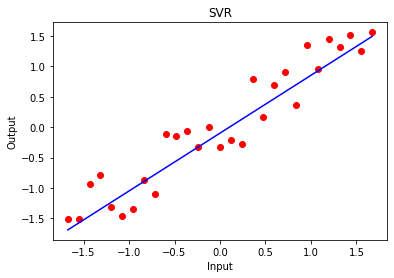

In [14]:
# First transform 6.5 to feature scaling
to_predict = 50
sc_X_val = sc_X.transform(np.array([[to_predict]]))
print(f"W : {W} - b: {b}")
print(f"Box: {box}")
# Second predict the value
scaled_y_pred = predict_linear(W, b, sc_X_val)
# scaled_y_pred = predict_poly(W, b, beta, sc_X_val, suppvect, DEG)
# Third - since this is scaled - we have to inverse transform
y_pred = sc_y.inverse_transform(scaled_y_pred) 
print(f'PREDICTION (INPUT = {to_predict})',y_pred)

plt.scatter(x, y , color="red")
pred = [float(predict_linear(W, b, x[i])) for i in range(x.size)]
#pred = [float(predict_poly(W, b, beta, x[i], suppvect, DEG)) for i in range(x.size)]
# print(pred)
# X_grid = np.arange(min(x), max(x), 0.01) #this step required because data is feature scaled.
# X_grid = X_grid.reshape((len(X_grid), 1))
# x = X_grid
# pred = [float(predict_rbf(W, b, beta, elem, suppvect)) for elem in X_grid]
plt.plot(x, pred, color="blue")
plt.title('SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

from scipy import optimize
g,dprev = np.array([1,2,3,4]),np.array([1,2,3,4])
def f(alpha):   # The rosenbrock function
    return np.linalg.norm(alpha*g+(1-alpha)*dprev)**2
alpha = 0.7
alpha = optimize.minimize(alpha,f, bounds=(0,1), method='bounded').x
alpha

W : [[0.96805762]] - b: [0.01399589]
Box: 1.0
PREDICTION (INPUT = 50) [154.13792376]


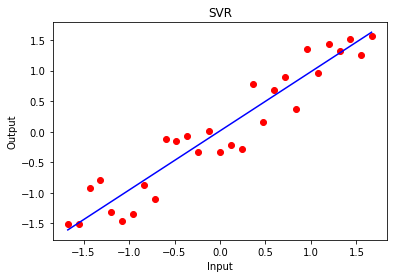

In [15]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
Y = np.hstack(y)
X = x
regressor.fit(X, Y)
y_scal = sc_X.transform(np.array([[to_predict]]))
y_pred = regressor.predict(y_scal)
y_pred = sc_y.inverse_transform(y_pred)
print(f"W : {regressor.coef_} - b: {regressor.intercept_}")
print(f"Box: {regressor.get_params()['C']}")
print(f'PREDICTION (INPUT = {to_predict})',y_pred)
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

In [16]:
# suppvect

In [17]:
# regressor.support_vectors_

In [18]:
regressor.support_

array([ 0,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       20, 21, 22, 23, 24, 26, 27])

In [19]:
regressor.epsilon

0.1

In [20]:
regressor.max_iter

-1

In [21]:
regressor.intercept_

array([0.01399589])

In [22]:
params.keys()

NameError: name 'params' is not defined

In [ ]:
params['gamma']

In [ ]:
params['C']

In [ ]:
regressor.coef_

In [ ]:
regressor.dual_coef_